## Quiz : Pole-Balancing

In this classic reinforcement learning task, a cart is positioned on a frictionless track, and a pole is attached to the top of the cart. The objective is to keep the pole from falling over by moving the cart either left or right, and without falling off the track.

In the [OpenAI Gym implementation](https://gym.openai.com/envs/CartPole-v0/), the agent applies a force of +1 or -1 to the cart at every time step. It is formulated as an episodic task, where the episode ends when (1) the pole falls more than 20.9 degrees from vertical, (2) the cart moves more than 2.4 units from the center of the track, or (3) when more than 200 time steps have elapsed. The agent receives a reward of +1 for every time step, including the final step of the episode. You can read more about this environment in [OpenAI's github](https://github.com/openai/gym/wiki/CartPole-v0). This task also appears in Example 3.4 of the textbook.

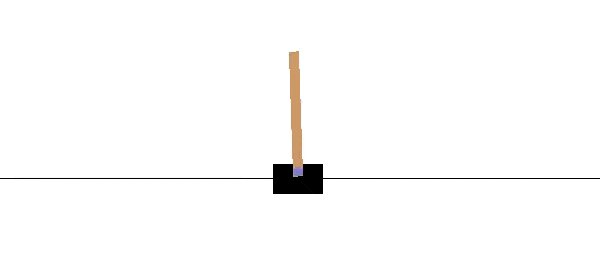

In [46]:
from IPython.display import Image
Image(filename='./images/1-1-6-4_cartpole_image.gif')

### QUESTION 1 OF 3

Recall that the agent receives a reward of +1 for every time step, including the final step of the episode. Which discount rates would encourage the agent to keep the pole balanced for as long as possible? (Select all that apply.)

1. The discount rate is 1.
2. The discount rate is 0.9.
3. The discount rate is 0.5.

- answer : 1, 2, 3
- explanation : For each of these discount rates, the agent receives a positive reward for each time step where the pole has not yet fallen. Thus, in each case, the agent will try to keep the pole balanced for as long as possible.

### QUESTION 2 OF 3

Say that the reward signal is amended to only give reward to the agent at the end of an episode. So, the reward is 0 for every time step, with the exception of the final time step. When the episode terminates, the agent receives a reward of -1. Which discount rates would encourage the agent to keep the pole balanced for as long as possible? (Select all that apply.)

1. The discount rate is 1.
2. The discount rate is 0.9.
3. The discount rate is 0.5.
4. (None of these discount rates would help the agent, and there is a problem with the reward signal.)

- answer : 2, 3
- explanation : Without discounting, the agent will always receive a reward of -1 (no matter what actions it chooses during the episode), and so the reward signal will not provide any useful feedback to the agent. With discounting, the agent will try to keep the pole balanced for as long as possible, as this will result in a return that is relatively less negative.

### QUESTION 3 OF 3

Say that the reward signal is amended to only give reward to the agent at the end of an episode. So, the reward is 0 for every time step, with the exception of the final time step. When the episode terminates, the agent receives a reward of +1. Which discount rates would encourage the agent to keep the pole balanced for as long as possible? (Select all that apply.)

1. The discount rate is 1.
2. The discount rate is 0.9.
3. The discount rate is 0.5.
4. (None of these discount rates would help the agent, and there is a problem with the reward signal.)


- answer : 4
- explanation : If the discount rate is 1, the agent will always receive a reward of +1 (no matter what actions it chooses during the episode), and so the reward signal will not provide any useful feedback to the agent. If the discount rate is 0.5 or 0.9, the agent will try to terminate the episode as soon as possible (by either dropping the pole quickly or moving off the edge of the track).

![Quiz-Explanation](./images/1-1-6-5_quiz_explanation.JPG)

## Quiz: One-Step Dynamics 1
Consider the recycling robot example. In the previous concept, we described one method that the environment could use to decide the state and reward, at any time step.

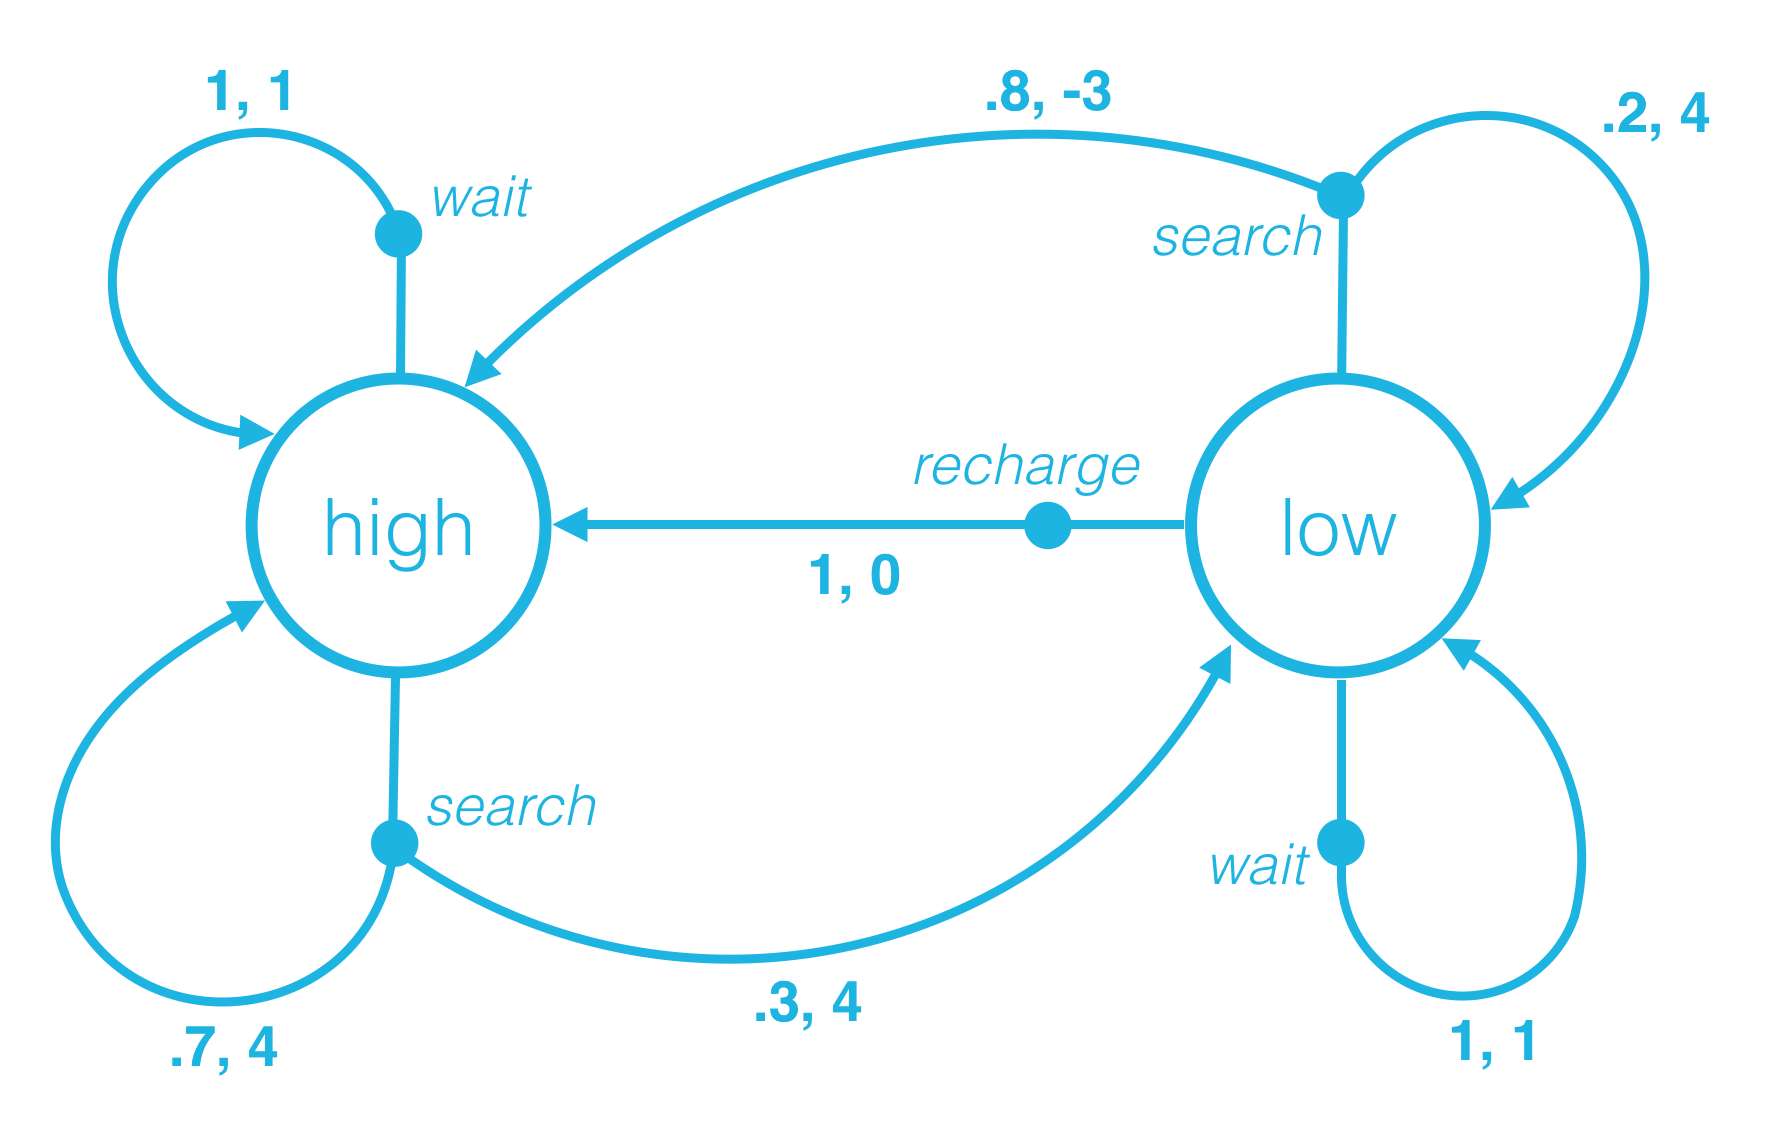

In [60]:
from IPython.display import Image
Image(filename='./images/1-1-7-15_recycling_robot_quiz_one_step_dynamics.png')

Say at an arbitrary time step t, the state of the robot's battery is high (St=high). Then, in response, the agent decides to search (At=search). You learned in the previous concept that in this case, the environment responds to the agent by flipping a theoretical coin with 70% probability of landing heads.

If the coin lands heads, the environment decides that the next state is high (St+1=high), and the reward is 4 (Rt+1=4).
If the coin lands tails, the environment decides that the next state is low (St+1=low), and the reward is 4 (Rt+1=4).
This is depicted in the figure below.

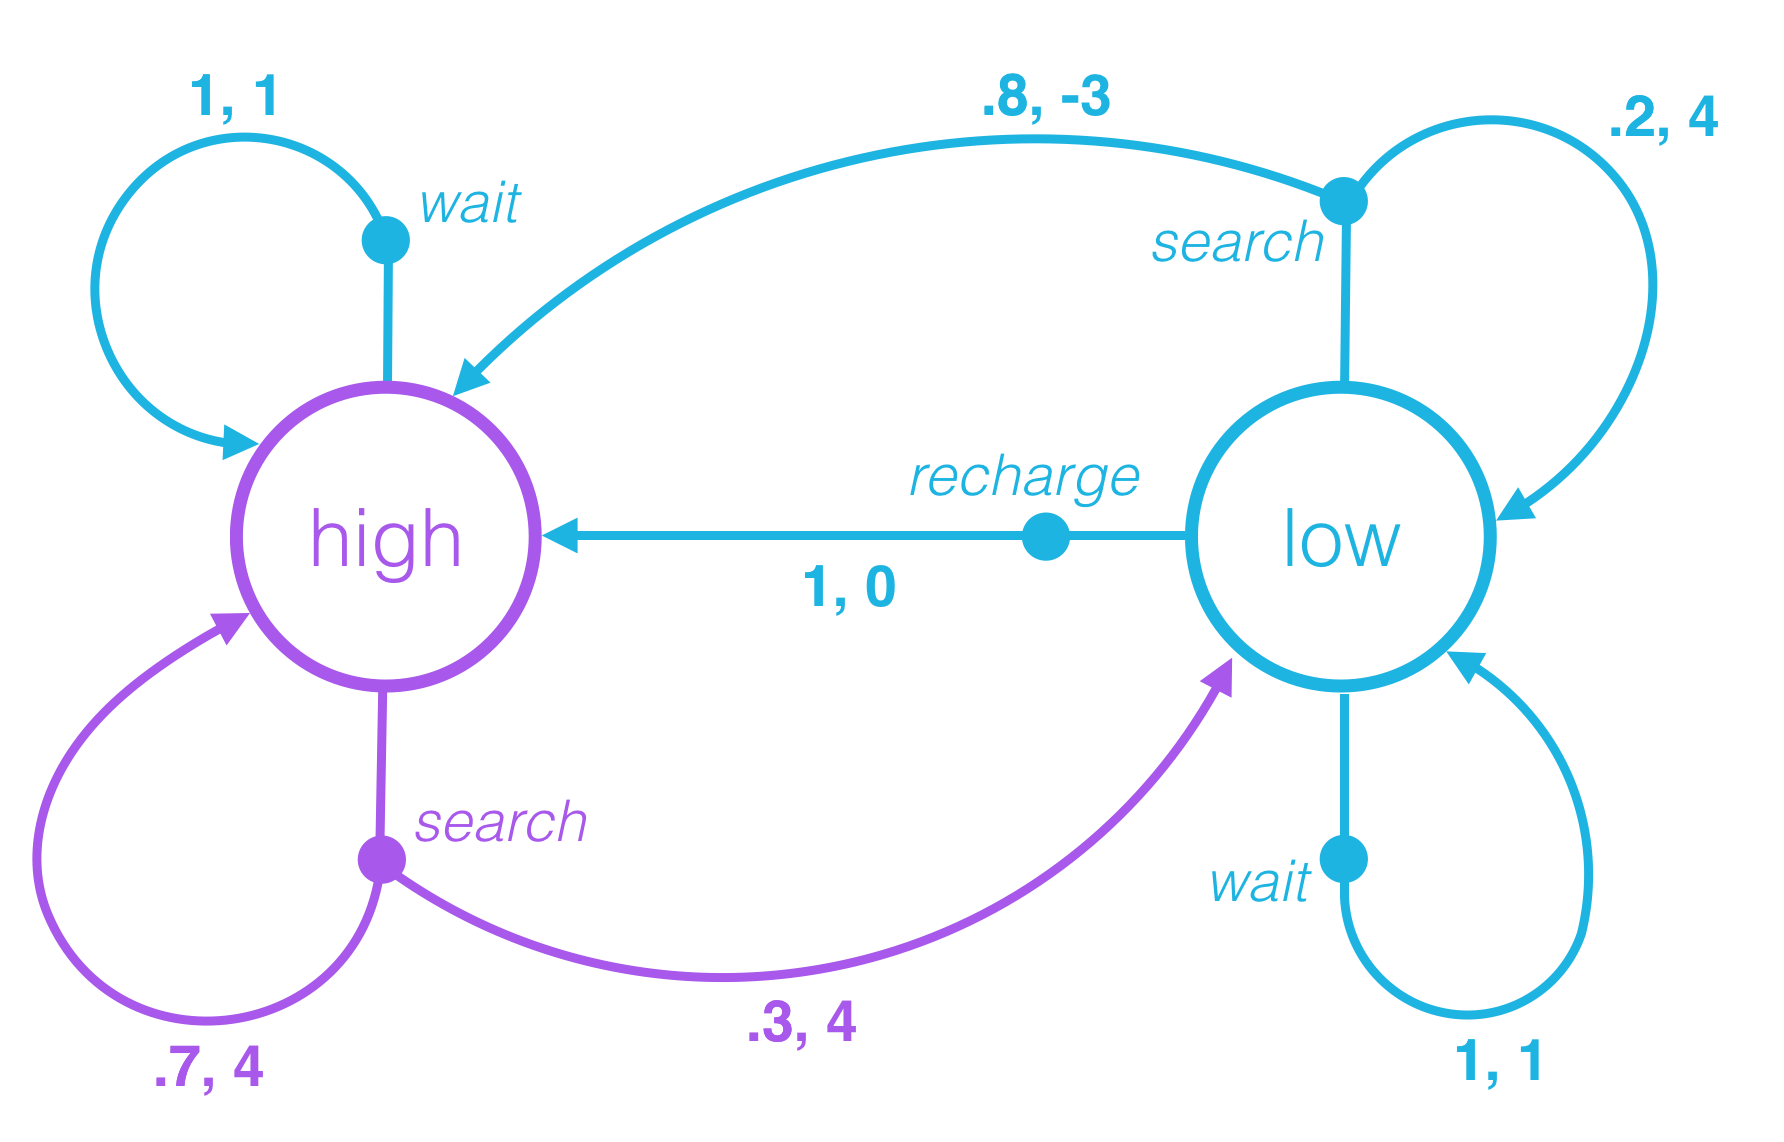

In [61]:
from IPython.display import Image
Image(filename='./images/1-1-7-16_recycling_robot_quiz_one_step_dynamics_when_state_is_hight_action_is_search.png')

In fact, for any state St and action At, it is possible to use the figure to determine exactly how the agent will decide the next state St+1 and reward Rt+1.

### QUESTION 1 OF 2
Say the current state is high, and the agent decides to wait. How does the environment decide the next state and reward?
1. With 80% probability, the next state is high, and the reward is -3. With 20% probability, the next state is low, and the reward is 4.
2. The next state is high, and the reward is 1.
3. The next state is low, and the reward is 1.
4. The next state is high, and the reward is 0.

- answer : 2
- explanation : 

### QUESTION 2 OF 2
Say the current state is low, and the agent decides to recharge. How does the environment decide the next state and reward?

1. With 80% probability, the next state is high, and the reward is -3. With 20% probability, the next state is low, and the reward is 4.
3. The next state is high, and the reward is 1.
4. The next state is low, and the reward is 1.
5. The next state is high, and the reward is 0.

- answer : 4
- explanation : 

## Quiz: One-Step Dynamics 2

It will prove convenient to represent the environment's dynamics using mathematical notation. In this concept, we will introduce this notation (which can be used for any reinforcement learning task) and use the recycling robot as an example.

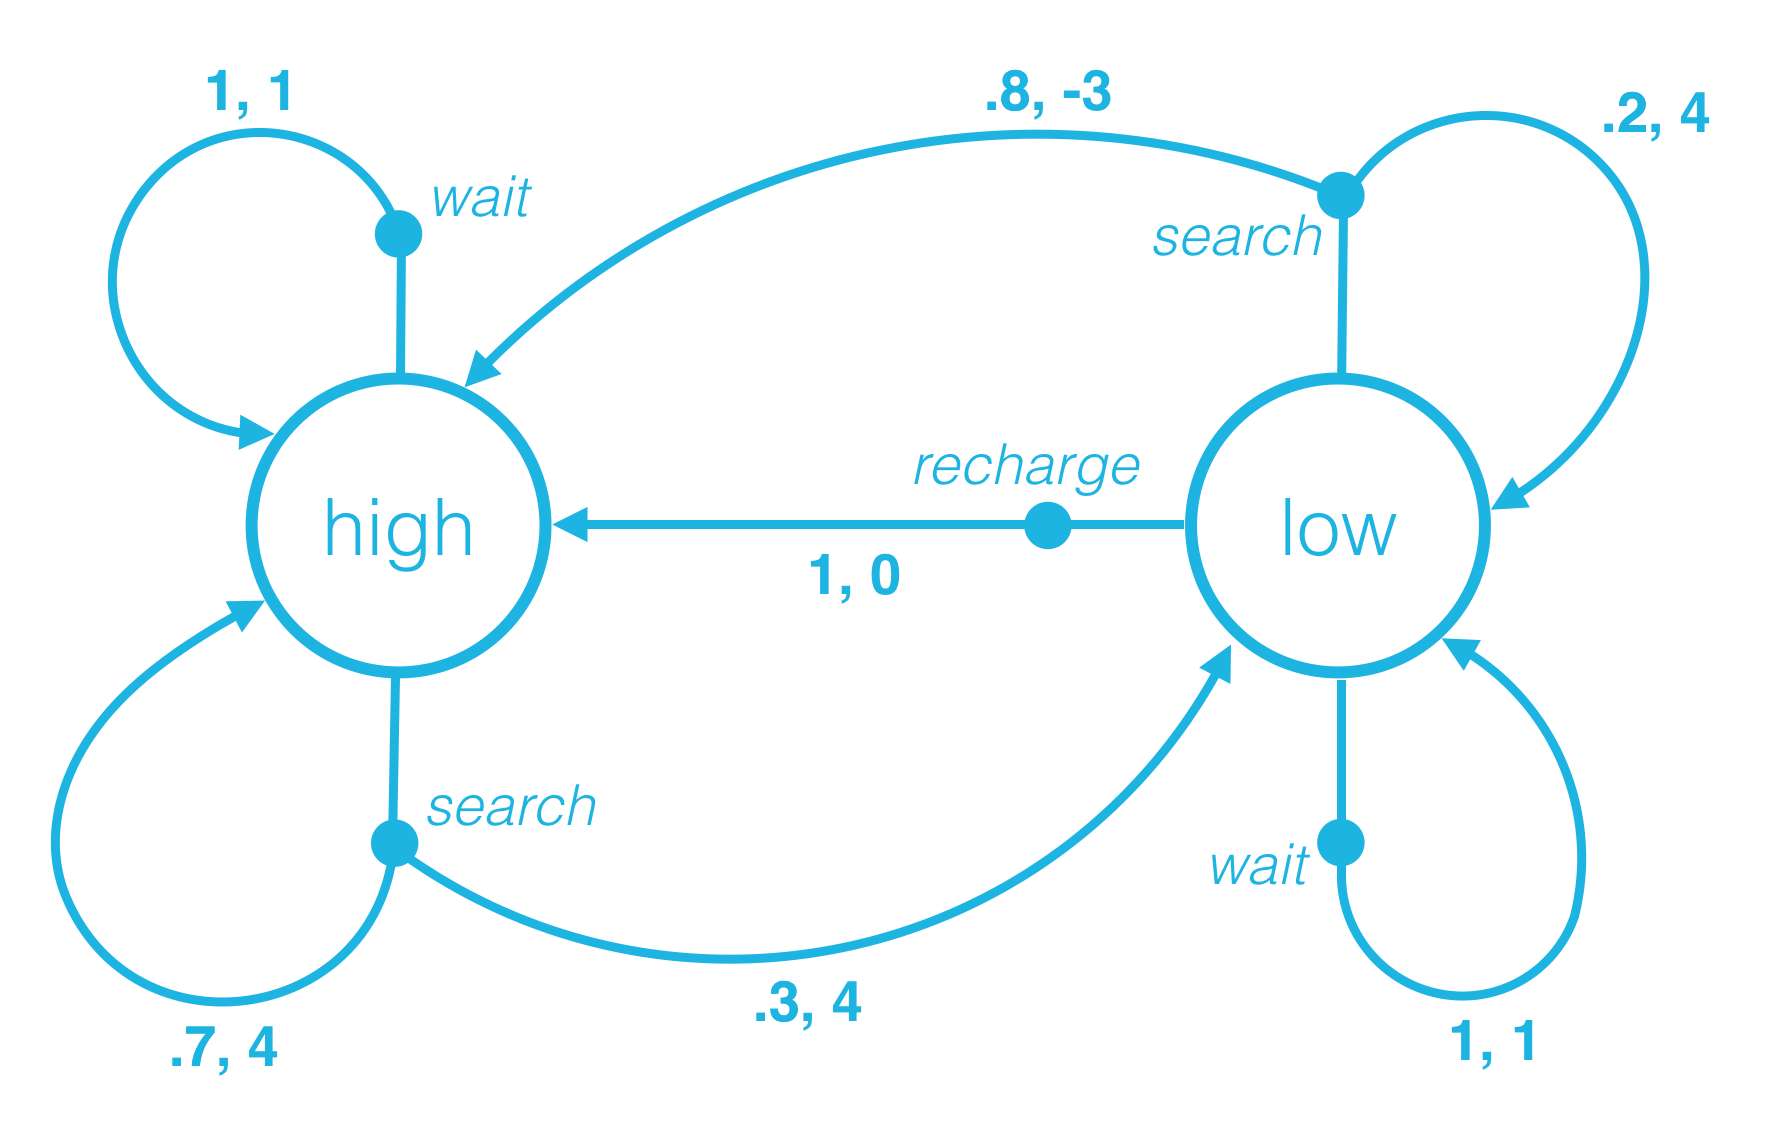

In [62]:
from IPython.display import Image
Image(filename='./images/1-1-7-15_recycling_robot_quiz_one_step_dynamics.png')

At an arbitrary time step t, the agent-environment interaction has evolved as a sequence of states, actions, and rewards

(S0,A0,R1,S1,A1,…,Rt−1,St−1,At−1,Rt,St,At).

When the environment responds to the agent at time step t+1, it considers only the state and action at the previous time step (St,At).

In particular, it does not care what state was presented to the agent more than one step prior. (In other words, the environment does not consider any of {S0,…,St−1}.)

And, it does not look at the actions that the agent took prior to the last one. (In other words, the environment does not consider any of {A0,…,At−1}.)

Furthermore, how well the agent is doing, or how much reward it is collecting, has no effect on how the environment chooses to respond to the agent. (In other words, the environment does not consider any of {R0,…,Rt}.)

Because of this, we can completely define how the environment decides the state and reward by specifying

p(s′,r∣s,a)≐P(St+1=s′,Rt+1=r∣St=s,At=a)

for each possible s′,r,s,and a. These conditional probabilities are said to specify the one-step dynamics of the environment.

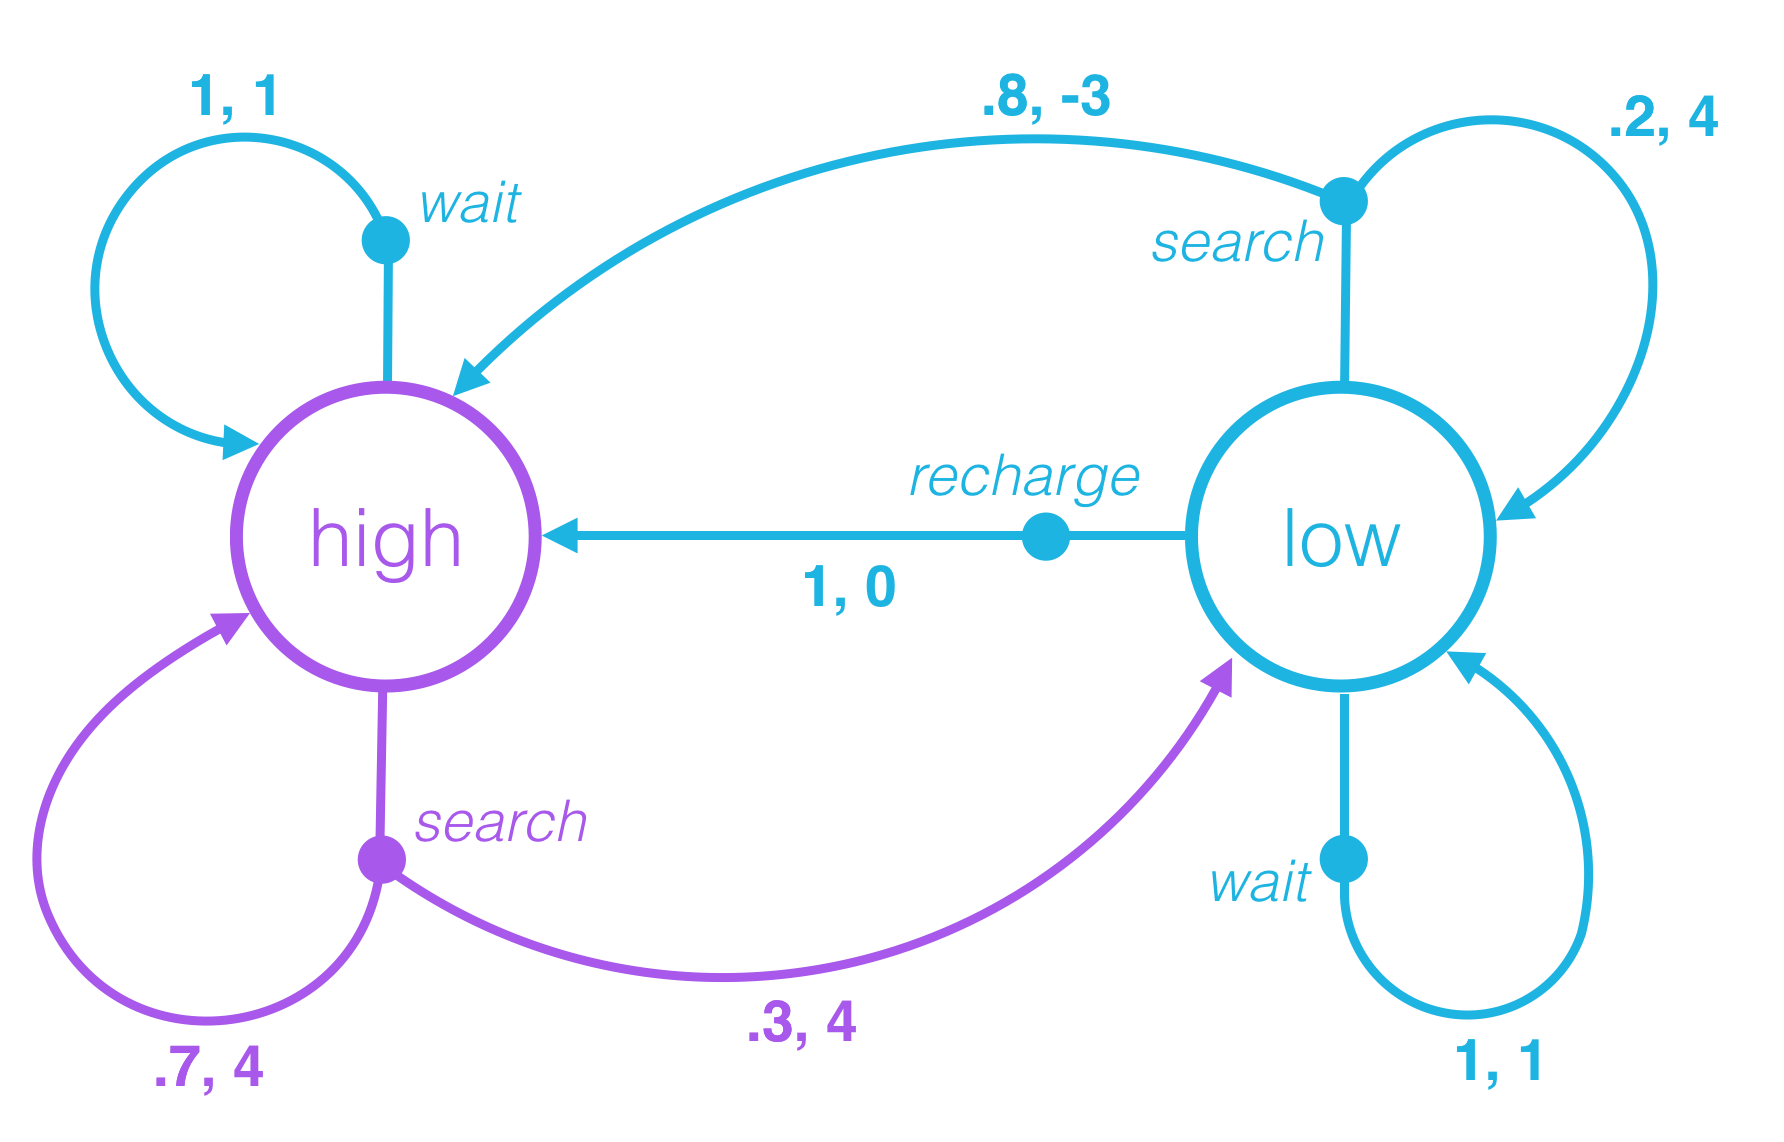

In [63]:
from IPython.display import Image
Image(filename='./images/1-1-7-16_recycling_robot_quiz_one_step_dynamics_when_state_is_hight_action_is_search.png')

### An Example
Let's return to the case that St=high, and At =search.

Then, when the environment responds to the agent at the next time step,

with 70% probability, the next state is high and the reward is 4. In other words, 

p(high,4∣high,search)=P(St+1=high,Rt+1=4∣St=high,At=search)=0.7.

with 30% probability, the next state is low and the reward is 4. In other words, 

p(low,4∣high,search)=P(St+1=low,Rt+1=4∣St=high,At=search)=0.3.

### QUESTION 1
What is p(high,−3∣low,search)? Calcurate the correct numerical value.

### QUESTION 2
What is p(high,0∣low,recharge)? Calcurate the correct numerical value.

- Q1 answer : 0.8
- Q2 answer : 1.0

### QUESTION 3 
Consider the following probabilities:

* (1) p(low,1∣low,search)
* (2) p(high,0∣low,recharge)
* (3) p(high,1∣low,wait)
* (4) p(high,1∣high,wait)
* (5) p(high,1∣high,search)

Which of the above probabilities is equal to 0? (Select all that apply.)

- answer : 1, 3, 5
- explanation : 

### QUESTION 4
Consider the following probabilities:

* (1) p(low,1∣low,search)
* (2) p(high,0∣low,recharge)
* (3) p(high,1∣low,wait)
* (4) p(high,1∣high,wait)
* (5) p(high,1∣high,search)

Which of the above probabilities is equal to 1? (Select all that apply.)

- answer : 2, 4
- explanation : 